In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/diabetes-dataset/diabetes2.csv


# Summary of the dataset
The data used for this analysis was collected and provided by the "National Institute of Diabetes and Digestive and Kidney Diseases" as part of the Pima Indians Diabetes Database. The dataset comprises instances from a larger database, with specific constraints. All patients included in the dataset belong to the Pima Indian heritage, which is a subgroup of Native Americans. Furthermore, all individuals in the dataset are females aged 21 and above.

# Goal
Here our goal will be to identify diabetes amoung all the patients.

# This Notebook will cover the following:¶
* Data Acquisition
* Data Preparation & Manupulation
* Exploratory Data Analysis
* Data Modelling and evaluation


If this Kernel helped you in any way, some UPVOTES would be very much appreciated

# 1. Data Acquisition

In [2]:
# Load the dataset
data = pd.read_csv("/kaggle/input/diabetes-dataset/diabetes2.csv")

In [3]:
# import all libraries and dependencies for dataframe
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
#information of the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


* The above data has no null values
* It has all numerical data that can be transformed if needed

In [6]:
# unique value of each column
data.nunique()

Pregnancies                  17
Glucose                     136
BloodPressure                47
SkinThickness                51
Insulin                     186
BMI                         248
DiabetesPedigreeFunction    517
Age                          52
Outcome                       2
dtype: int64

In [7]:
# Total count of 'Outcome'
data['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

There is a much larger proportion of negetive 'Outcome' than positive 'Outcome', the classifier may be biased towards the majority class (negetive).

In [8]:
# description of the data
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


* We can see that in some columns like Glucose,BloodPressure,SkinThickness,Insulin & BMI min value is 0 which is unrealistic. 
* Pregnency data can be zero.
* We can replace all those data with their respective mean value of the column.

In [9]:
print("No of zero in Glucose ",data['Glucose'].isin([0]).sum())
print("No of zero in BloodPressure ",data['BloodPressure'].isin([0]).sum())
print("No of zero in SkinThickness ",data['SkinThickness'].isin([0]).sum())
print("No of zero in Insulin ",data['Insulin'].isin([0]).sum())
print("No of zero in BMI ",data['BMI'].isin([0]).sum())

No of zero in Glucose  5
No of zero in BloodPressure  35
No of zero in SkinThickness  227
No of zero in Insulin  374
No of zero in BMI  11


# 2. Data Preparation & Manupulation

In [10]:
# Lets replace all the zero with mean value of the column
data_pre=data.copy()

data_pre['Glucose']=data_pre['Glucose'].replace(0,data['Glucose'].mean())
data_pre['BloodPressure']=data_pre['BloodPressure'].replace(0,data['BloodPressure'].mean())
data_pre['SkinThickness']=data_pre['SkinThickness'].replace(0,data['SkinThickness'].mean())
data_pre['Insulin']=data_pre['Insulin'].replace(0,data['Insulin'].mean())
data_pre['BMI']=data_pre['BMI'].replace(0,data['BMI'].mean())

In [11]:
# Pregnancy value more than zero can be converted into 1
data_pre['Pregnancies'].values[data_pre['Pregnancies'] >1]=1

In [12]:
# Lets check the new dataset
data_pre.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,0.855469,121.681605,72.254807,26.606479,118.660163,32.450805,0.471876,33.240885,0.348958
std,0.351857,30.436016,12.115932,9.631241,93.080358,6.875374,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.500000,0.243750,24.000000,0.000000
50%,1.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,1.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,1.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# 3. Exploratory Data Analysis

* Here the outcome dependent variable is binary where '0' mean 'no-diabetic' and '1' means 'diabetic'
* Hence we may consider logistic regression model but before we need to satisfy all the below assumptions of binomial logistic regression

Linearity

Independence

No Multicollinearity

No Outliers

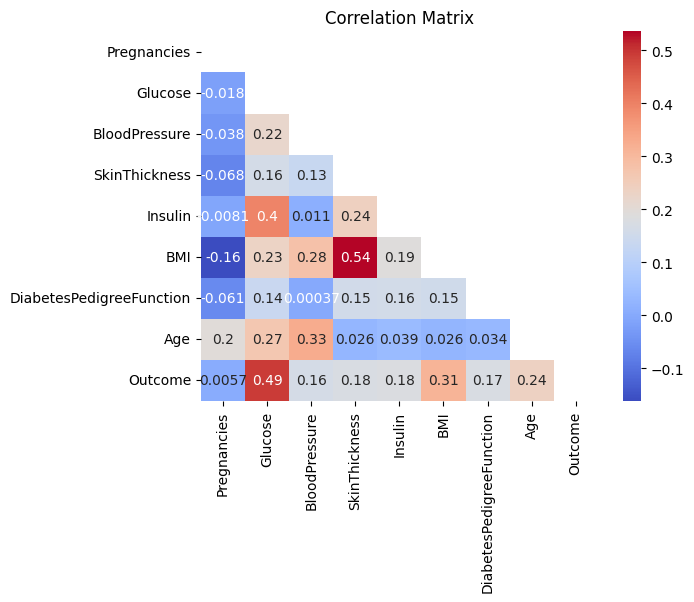

In [13]:
# Heatmap will show us the relationship between two variables
mask=np.triu(np.ones_like(data_pre.corr()))
sns.heatmap(data_pre.corr(),cmap='coolwarm',mask=mask,annot=True)
plt.title('Correlation Matrix')
plt.show()

**Findings**
* From above heatmap it is clear that their is strong correlation between BMI & Skinthikness
* The Outcome is correlated with Glucose & BMI
* There is no reverse correlation between outcome and other independent variables
* We can observe some more correlation between age & bloodpressure and insulin & glucose

Text(0.5, 1.0, 'Insulin Vs Glucose')

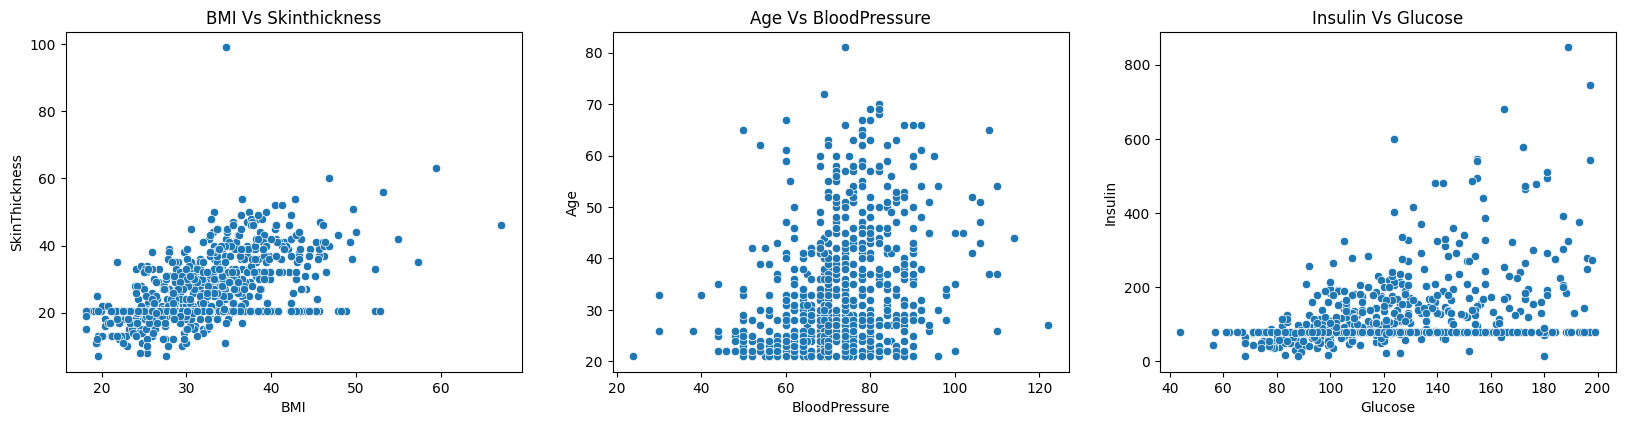

In [14]:
# Lets evaluate some more insights the data relationships
plt.figure(figsize=(20, 15))
plt.subplot(3,3,1)
sns.scatterplot(data=data_pre,x="BMI",y="SkinThickness")
plt.title('BMI Vs Skinthickness')
plt.subplot(3,3,2)
sns.scatterplot(data=data_pre,x="BloodPressure",y="Age")
plt.title('Age Vs BloodPressure')
plt.subplot(3,3,3)
sns.scatterplot(data=data_pre,x="Glucose",y="Insulin")
plt.title('Insulin Vs Glucose')

**Feature selection**
* We found a strong relationship between between two independent variable 'BMI' & 'Skinthickness'. But compare to Skinthickness, BMI has strong relationship with y variable 'outcome'.
* Hence to follow 'No Multicollinearity' assumption, we can drop 'Skinthickness'.

In [15]:
data_pre=data_pre.drop('SkinThickness',axis=1)

**Now lets check the outliers in 'Glucose' and 'BMI' which are the most influencing variable in current situation**

Text(0.5, 1.0, 'Outlier Identification')

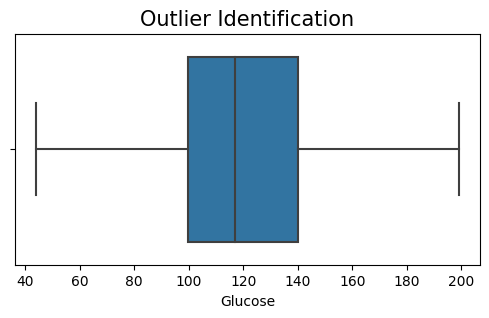

In [16]:
#Showing outliers of 'Glucose' in boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_pre['Glucose'])
plt.title('Outlier Identification', fontsize=15 )
# No-Outliers has been found

Text(0.5, 1.0, 'Outlier Identification')

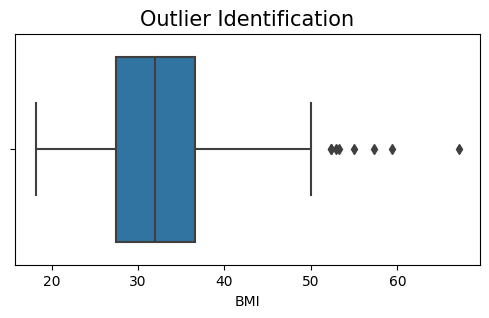

In [17]:
#Showing outliers of 'BMI' in boxplot
plt.figure(figsize=(6, 3))
sns.boxplot(x=data_pre['BMI'])
plt.title('Outlier Identification', fontsize=15 )

In [18]:
#Defining the Quartiles for removal of outliers
Q1=data_pre['BMI'].quantile(0.25)
Q3=data_pre['BMI'].quantile(0.75)
IQR=Q3-Q1
lowoutlier=Q1-1.5*IQR
highoutlier=Q3+1.5*IQR
totaloutlier=((data_pre['BMI']<lowoutlier)|(data_pre['BMI']>highoutlier)).sum()
totaloutlier

8

In [19]:
# Removal of Outliers
data_pre1=data_pre[(data_pre['BMI']<highoutlier)&(data_pre['BMI']>lowoutlier)]
#validating the removal of outlier
totaloutlier = ((data_pre1['BMI'] < lowoutlier) | (data_pre1['BMI'] > highoutlier)).sum()
print("Total Number of Outliers in the BMI are {}".format(totaloutlier))

Total Number of Outliers in the BMI are 0


**In the above database all the outliers has been removed hence we can proceed for logistic regression**

# 4. Data Modelling and evaluation

**Logistic Regression**

In [20]:
# load sci-kit learn functions for constructing logistic regression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Save x & y variables
y=data_pre1['Outcome']
x=data_pre1.drop('Outcome',axis=1)

In [21]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=101)
# Build regression model
model=LogisticRegression()
model.fit(x_train,y_train)
# Save the prediction
y_pred=model.predict(x_test)

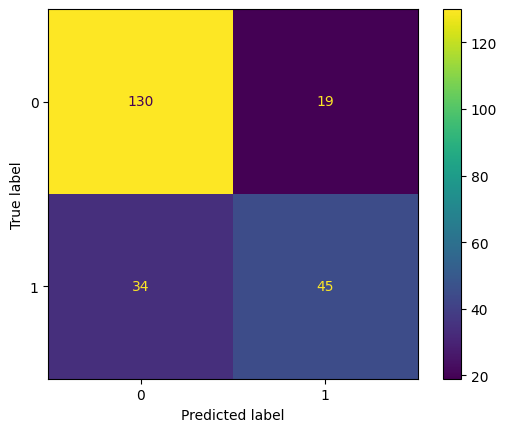

In [22]:
from sklearn import metrics
from sklearn.metrics import confusion_matrix
cm=confusion_matrix(y_test,y_pred)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

True negatives: The count of observations that a classifier correctly predicted as False 130

True positives: The count of observations that a classifier correctly predicted as True 45

False positives: The count of observations that a classifier incorrectly predicted as True 19

False negatives: The count of observations that a classifier incorrectly predicted as False 34

In [23]:
# logistic regression classifiers
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       149
           1       0.70      0.57      0.63        79

    accuracy                           0.77       228
   macro avg       0.75      0.72      0.73       228
weighted avg       0.76      0.77      0.76       228



Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. Here the precision for the "diabetic" class is 0.70, which means that 70% of the predicted as diabetic by the model were actually diabetic.

Recall: Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. Here the recall for the "diabetic" class is 0.57, indicating that the model correctly identified 57% of all diabetics.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. Here the F1-score for the "diabetic" class is 0.63, which indicates a balance between precision and recall.

We have seen before that the database has a much larger proportion of negetive 'Outcome' than positive 'Outcome', the classifier may be biased towards the majority class (negetive) and thus the accuracy metric in this context may not be meaningful.

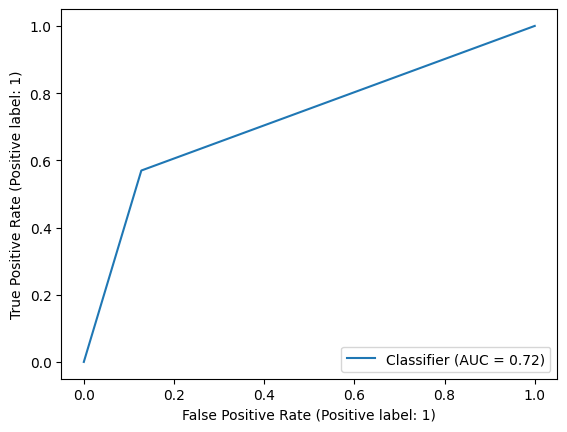

In [24]:
# ROC curve & AUC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred)
plt.show()

* The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data.
* AUC is 0.72, that means 72% of the classifier’s predictions are correct across all classification thresholds.  

**Naive Bayes (GaussianNB)**

In [25]:
from sklearn.naive_bayes import GaussianNB
gnb=GaussianNB()
gnb.fit(x_train,y_train)
y_pred1=gnb.predict(x_test)

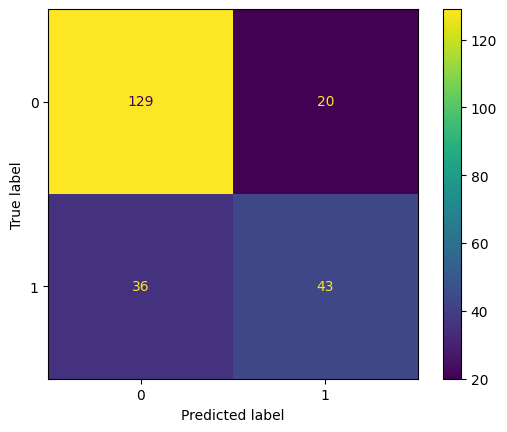

In [26]:
cm1=confusion_matrix(y_test,y_pred1)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm1)
disp.plot()

True negatives: The count of observations that a classifier correctly predicted as False 129

True positives: The count of observations that a classifier correctly predicted as True 43

False positives: The count of observations that a classifier incorrectly predicted as True 20

False negatives: The count of observations that a classifier incorrectly predicted as False 36

In [27]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       0.78      0.87      0.82       149
           1       0.68      0.54      0.61        79

    accuracy                           0.75       228
   macro avg       0.73      0.71      0.71       228
weighted avg       0.75      0.75      0.75       228



Precision: Precision measures the proportion of true positive predictions among all positive predictions made by the model. Here the precision for the "diabetic" class is 0.68, which means that 68% of the predicted as diabetic by the model were actually diabetic.

Recall: Recall measures the proportion of true positive predictions among all actual positive instances in the dataset. Here the recall for the "diabetic" class is 0.54, indicating that the model correctly identified 54% of all diabetics.

F1-score: The F1-score is the harmonic mean of precision and recall. It provides a single score that balances both precision and recall. Here the F1-score for the "diabetic" class is 0.61, which indicates a balance between precision and recall.

We have seen before that the database has a much larger proportion of negetive 'Outcome' than positive 'Outcome', the classifier may be biased towards the majority class (negetive) and thus the accuracy metric in this context may not be meaningful.

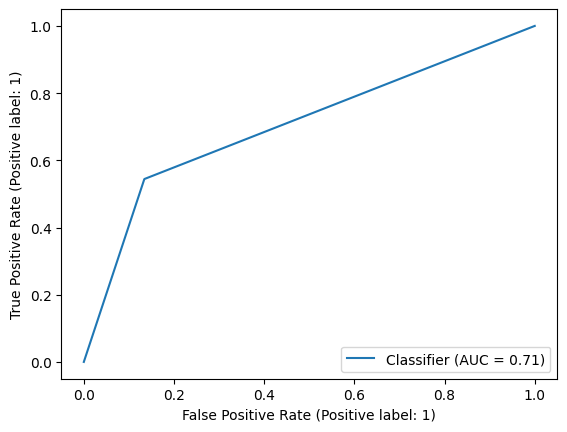

In [28]:
# ROC curve & AUC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred1)
plt.show()

* The more that the ROC curve hugs the top left corner of the plot, the better the model does at classifying the data.
* AUC is 0.71, that means 71% of the classifier’s predictions are correct across all classification thresholds.

**Decision Tree Classifier**

In [29]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

#hyperparameters
tree_para={'max_depth':[2,4,5,6,7,8,9,10],'min_samples_leaf':[2,5,10,20,30,40,50]}
#scoring
scoring={'accuracy','precision','recall','f1'}

tuned_decision_tree=DecisionTreeClassifier(random_state=101)
clf=GridSearchCV(tuned_decision_tree,tree_para,scoring=scoring,cv=5,refit="f1")
clf.fit(x_train,y_train)

# Predict the labels of the test set
y_pred2 = clf.predict(x_test)
y_pred2
clf.best_estimator_

DecisionTreeClassifier(max_depth=4, min_samples_leaf=30, random_state=101)

In [30]:
#F1 Score
clf.best_score_

0.60853889943074

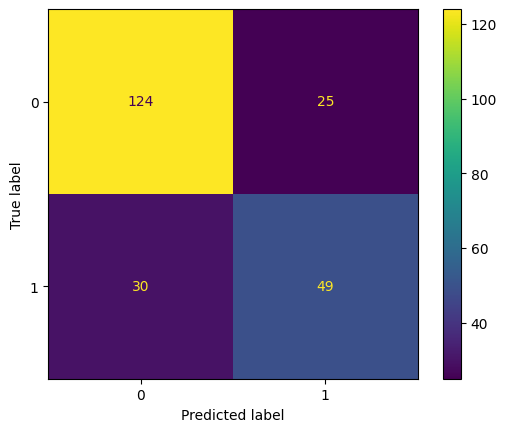

In [31]:
cm2=confusion_matrix(y_test,y_pred2)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm2)
disp.plot()

In [32]:
print(classification_report(y_test,y_pred2))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       149
           1       0.66      0.62      0.64        79

    accuracy                           0.76       228
   macro avg       0.73      0.73      0.73       228
weighted avg       0.76      0.76      0.76       228



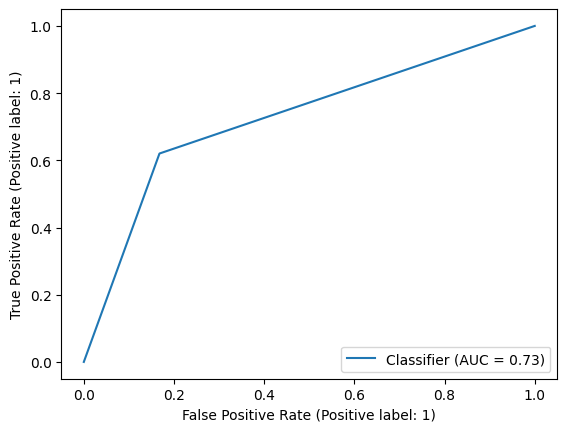

In [33]:
# ROC curve & AUC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred2)
plt.show()

**Random Forest**

In [34]:
from sklearn.ensemble import RandomForestClassifier
cv_params={'max_depth':[2,3,4,5,None],
           'min_samples_leaf':[1,2,3],
           'min_samples_split':[2,3,4],
           'max_features':[2,3,4],
           'n_estimators':[75,100,125,150]}
rf=RandomForestClassifier(random_state=0)
scoring={'accuracy','precision','recall','f1'}

In [35]:
x_tr,y_tr,x_val,y_val=train_test_split(x_train,y_train,test_size=0.2,stratify=y_train,random_state=10)
split_index=[0 if x in x_val.index else-1 for x in x_train.index]
from sklearn.model_selection import PredefinedSplit
custom_split=PredefinedSplit(split_index)

In [36]:
rf_val=GridSearchCV(rf,cv_params,scoring=scoring,cv=custom_split,refit='f1')

In [37]:
%%time
rf_val.fit(x_train,y_train)

CPU times: user 1min 47s, sys: 782 ms, total: 1min 48s
Wall time: 1min 48s


GridSearchCV(cv=PredefinedSplit(test_fold=array([0, 0, ..., 0, 0])),
             estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [2, 3, 4, 5, None],
                         'max_features': [2, 3, 4],
                         'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [38]:
# Predict the labels of the test set
y_pred3 = rf_val.predict(x_test)
y_pred3
rf_val.best_params_

{'max_depth': 5,
 'max_features': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 150}

In [39]:
#F1 Score
rf_val.best_score_

0.6513157894736842

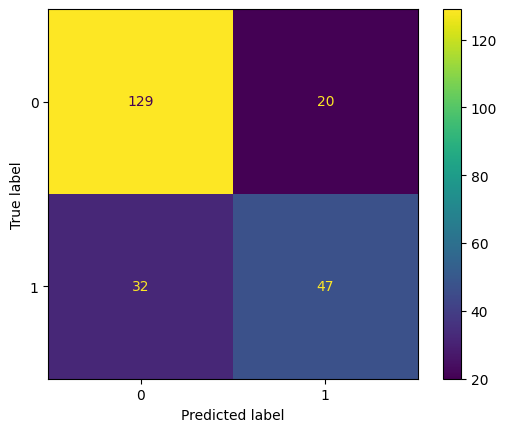

In [40]:
cm3=confusion_matrix(y_test,y_pred3)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm3)
disp.plot()

In [41]:
print(classification_report(y_test,y_pred3))

              precision    recall  f1-score   support

           0       0.80      0.87      0.83       149
           1       0.70      0.59      0.64        79

    accuracy                           0.77       228
   macro avg       0.75      0.73      0.74       228
weighted avg       0.77      0.77      0.77       228



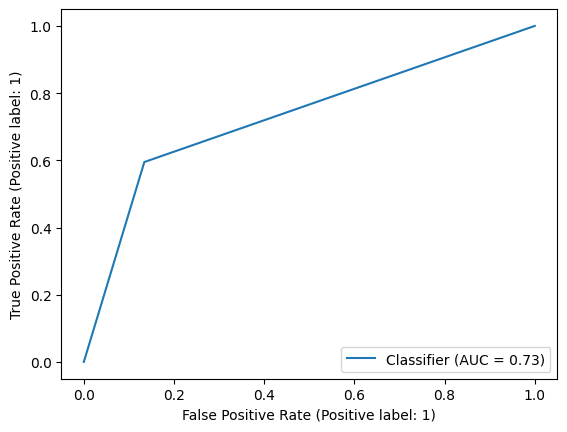

In [42]:
# ROC curve & AUC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred3)
plt.show()

**XGBoosting**

In [43]:
from xgboost import XGBClassifier
cv_params={'max_depth':[4,5,6,7,8],
           'min_child_weight':[1,2,3,4,5],
           'learning_rate':[0.1,0.2,0.3],
           'n_estimators':[75,100,125,150]}
xgb=XGBClassifier(objective='binary:logistic',random_state=0)
scoring={'accuracy','precision','recall','f1'}

In [44]:
xgb_cv=GridSearchCV(xgb,cv_params,scoring=scoring,cv=5,refit='f1')

In [45]:
%%time
xgb_cv.fit(x_train,y_train)

CPU times: user 6min 50s, sys: 9.08 s, total: 6min 59s
Wall time: 1min 53s


GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=None,
                                     n_jobs=None, num_parallel_tree=None,
                                     random_state=0, ...),
             param_grid={'learning_rate': [0.1, 0.2, 0.3],
                         'max_depth': [4, 5, 6, 7, 8],
                         'min_child_weight': [1, 2, 3, 4, 5],
                         'n_estimators': [75, 100, 125, 150]},
             refit='f1', scoring={'accuracy', 'f1', 'precision', 'recall'})

In [46]:
# Predict the labels of the test set
y_pred4 = xgb_cv.predict(x_test)
y_pred4
xgb_cv.best_params_

{'learning_rate': 0.1,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 75}

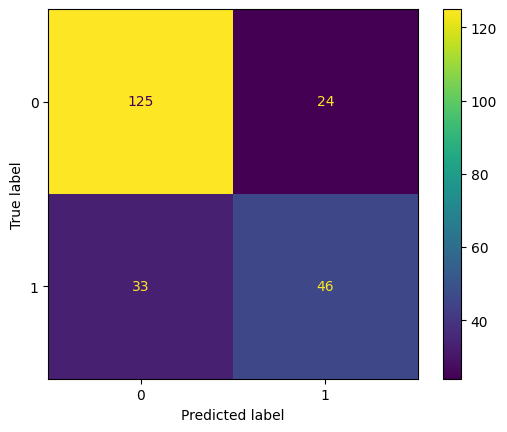

In [47]:
cm4=confusion_matrix(y_test,y_pred4)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm4)
disp.plot()

In [48]:
print(classification_report(y_test,y_pred4))

              precision    recall  f1-score   support

           0       0.79      0.84      0.81       149
           1       0.66      0.58      0.62        79

    accuracy                           0.75       228
   macro avg       0.72      0.71      0.72       228
weighted avg       0.74      0.75      0.75       228



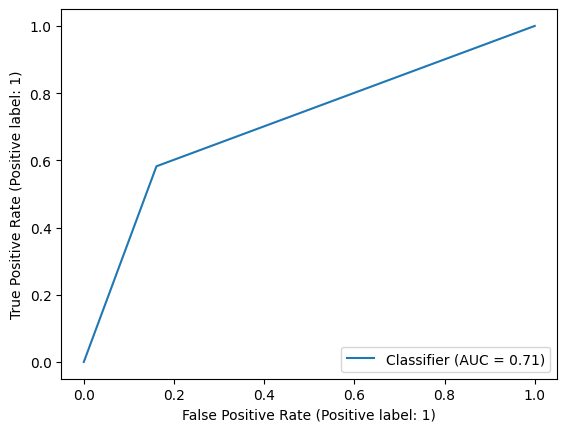

In [49]:
# ROC curve & AUC
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(y_test, y_pred4)
plt.show()

**Classification Report Evaluation**

In [50]:
print('Linear Regression:',classification_report(y_test,y_pred))
print('Naive Bayes:',classification_report(y_test,y_pred1))
print('Decision Tree:',classification_report(y_test,y_pred2))
print('Random Forest:',classification_report(y_test,y_pred3))
print('XGBoost:',classification_report(y_test,y_pred4))

Linear Regression:               precision    recall  f1-score   support

           0       0.79      0.87      0.83       149
           1       0.70      0.57      0.63        79

    accuracy                           0.77       228
   macro avg       0.75      0.72      0.73       228
weighted avg       0.76      0.77      0.76       228

Naive Bayes:               precision    recall  f1-score   support

           0       0.78      0.87      0.82       149
           1       0.68      0.54      0.61        79

    accuracy                           0.75       228
   macro avg       0.73      0.71      0.71       228
weighted avg       0.75      0.75      0.75       228

Decision Tree:               precision    recall  f1-score   support

           0       0.81      0.83      0.82       149
           1       0.66      0.62      0.64        79

    accuracy                           0.76       228
   macro avg       0.73      0.73      0.73       228
weighted avg       0.76    

# Conclusion

There is a noticeable class imbalance between the two target classes (0 and 1). Class 0 has a significantly higher number of instances compared to class 1 across all classifiers.

In general, precision, recall, and F1-score for class 1 (minority class) are lower compared to those for class 0 (majority class) for all classifiers. This indicates that the classifiers have difficulty correctly predicting instances of the minority class.

The high accuracy can be attributed to the classifiers performing well on the majority class while potentially misclassifying instances of the minority class.

There is a trade-off between precision and recall, particularly for class 1. Classifiers with higher precision tend to have lower recall and vice versa. This suggests that increasing precision (reducing false positives) may result in a decrease in recall (increasing false negatives) and vice versa.

If correctly identifying instances of the minority class is crucial (higher recall for class 1), one might prioritize classifiers with higher recall for class 1, even if it comes at the cost of slightly lower precision.